# <a id="index" href="#index">各種操作</a>
* [前処理](#section0)
* [各音の変化のしやすさ](#section1)
* [各音の変化のしやすさ改](#section2)
* [大べつした変化の種類](#section3)

# <a id="section0" href="#section0">前処理</a>

<!--
<p class="ec__link-index"><a href="#index">[↑ 目次へ]</a></p>
-->

In [1]:
import math
import pandas as pd
import openpyxl
import numpy as np
# from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
basepath = "/Users/kazuki/Documents/Study/data/ryukyu/{}"
rftri    = basepath.fotmat("gramTri/pattern/{}.xlsx")
rflocate = basepath.fotmat("parameter/locations.xlsx")
rftango  = basepath.fotmat("parameter/sheetlist.xlsx")

In [3]:
locateDf = pd.read_excel(rflocate, sheet_name=0, header=0, index_col=0)
tangoDf  = pd.read_excel(rftango , sheet_name=0, header=0, index_col=0)

In [4]:
shNs     = list(locateDf.iloc[0:,0])
locates  = list(locateDf.iloc[0:,2]) 

# <a id="section1" href="#section1">各音の変化のしやすさ</a>
* [使われている子音一覧を特定](#subsection1-0)
* [特定の子音の分析](#subsection1-1)

<p class="ec__link-index"><a href="#index">[↑ 目次へ]</a></p>

## <a id="subsection1-0" href="#subsection1-0">使われている子音一覧を特定</a>

In [5]:
rfrule=basepath.fotmat("parameter/rule2.xlsx")

In [30]:
ruleDf=pd.read_excel(rfrule , sheet_name=3, header=0, index_col=0) #sheet_name=3:子音入力数値一覧

In [31]:
allconsonants=list(ruleDf.index)

In [32]:
print(allconsonants)

['p', 'ph', 'px', 'pj', 'pjh', 'pjx', 'b', 'bj', 'hw', '?', '!', 'h', 'h!', 'm', '!m', '?m', 'mj', '!mj', '?mj', 'f', 'v', 't', 'th', 'tx', 'ts3', 'tj', 'tjh', 'tjx', 'd', 'ts', 'tsh', 'tsx', 'ts2', 'ts2h', 'ts2x', 'dz', 'dz1', 'dz2', 's', 's1', 's2', 'z', 'z2', 'n', '!n', '?n', 'nj', '!nj', '?nj', 'r', '?r', 'rj', 'hj', 'k', 'kh', 'kx', 'kj', 'kjh', 'kjx', 'kw', 'kwh', 'kwx', 'g', 'gj', 'gw', 'ng', 'j', '?j', '!j', 'w', '?w', '!w', 'n2', '?n2', '!n2', 'n2:', '?n2:', 'in2', '?in2', 'q', 'l']


In [24]:
print(shNs[0])

XXX


In [27]:
tmpDf=pd.read_excel(rftri.format(locates[0]) , sheet_name=shNs[0], header=0, index_col=0)

In [33]:
patterns=list(tmpDf.index)

In [36]:
consonants=[]
for pi,pattern in enumerate(patterns):
    moto,hikaku=pattern.split("->")
    moto=moto.split(" ")
    hikaku=hikaku.split(" ")
    for consonant in allconsonants:
        if (consonant in moto) and (consonant not in consonants):
            print(consonant)
            consonants.append(consonant)

k
b
kx
kh
p
d
n
ts
r
tsx
ts2x
tsh
tx
ts2h
ts2
th
s2
t
m
n2
h
hw
ph
kwh
kw
j
ts3
dz2
s
pjh
hj
g
dz
ng
in2
?
n2:
f
v
w
q
kwx
h!
l
z
?m
?n2
gw
?j
?n2:
gj
px
kj
?in2
nj
pj
tjx
pjx


In [37]:
print(consonants)

['k', 'b', 'kx', 'kh', 'p', 'd', 'n', 'ts', 'r', 'tsx', 'ts2x', 'tsh', 'tx', 'ts2h', 'ts2', 'th', 's2', 't', 'm', 'n2', 'h', 'hw', 'ph', 'kwh', 'kw', 'j', 'ts3', 'dz2', 's', 'pjh', 'hj', 'g', 'dz', 'ng', 'in2', '?', 'n2:', 'f', 'v', 'w', 'q', 'kwx', 'h!', 'l', 'z', '?m', '?n2', 'gw', '?j', '?n2:', 'gj', 'px', 'kj', '?in2', 'nj', 'pj', 'tjx', 'pjx']


In [38]:
print(len(allconsonants))
print(len(consonants))

81
58


In [39]:
wfcon=basepath.fotmat("parameter/consonantsUsed.xlsx")

In [41]:
with pd.ExcelWriter(wfcon, engine='openpyxl') as writer:
    wdata=np.array(consonants)
    wdf=pd.DataFrame(wdata.T,index=list(range(len(consonants))), columns=["子音"])
    wdf.to_excel(writer,sheet_name="子音一覧") #シート名[地点名]

## <a id="subsection1-1" href="#subsection1-1">特定の子音の比較</a>

In [5]:
rfconsonants=basepath.fotmat("parameter/consonantsUsed.xlsx")

In [6]:
consonantsDf=pd.read_excel(rfconsonants , sheet_name=0, header=0, index_col=0)

In [7]:
consonants=consonantsDf.iloc[0:,0].tolist()

In [8]:
print(consonants[0])

k


In [9]:
conper=[[0,0] for locate in locates]
# conper=[[[0,0 for consonant in consonants] for locate in locates]
for i,(shN,locate)  in enumerate(zip(shNs,locates)):
    print(shN)
    triDf=pd.read_excel(rftri.format(locate) , sheet_name=shN, header=0, index_col=0)
    for pi,pattern in enumerate(list(triDf.index)):
        moto,hikaku=pattern.split("->")
        moto=moto.split(" ")
        hikaku=hikaku.split(" ")
        if (consonants[0] in moto) and moto[moto.index(consonants[0])] == hikaku[moto.index(consonants[0])]:
            conper[i][0]+=sum(triDf.iloc[pi,0:].tolist())
        elif (consonants[0] in moto) and moto[moto.index(consonants[0])] != hikaku[moto.index(consonants[0])]:
            conper[i][1]+=sum(triDf.iloc[pi,0:].tolist())
#         for o1,o2 in zip(moto,hikaku):
#             if (o1 in consonants) and o1 == o2:
#                 conin=consonants.index(o1)
#                 conper[i][conin][0]+=sum(triDf.iloc[pi,0:].tolist())
#             elif (o1 in consonants) and o1 != o2:
#                 conin=consonants.index(o1)
#                 conper[i][conin][0]+=sum(triDf.iloc[pi,0:].tolist())

XXX
KA05
NZ17
KM05
YU04
SY08
YU18
AN05
AN13
AH14
AH15
KK01
KK12
KK22
NM04
TH03
OM03
OK02
OK06
YR01
IH02
IZ01
IE02
KU14
KU08
OG07
NN12
MB02
MB06
HJ08
NG06
ON04
KI06
YT15
MS01
GK07
GS08
YN02
YN09
CT12
NK17
GW01
GW06
US06
NH10
NK25
MW03
MW04
MW12
MW13
MW09
HB04
OZ02
OZ05
SS05
CN05
CN08
TM03
TM07
GC02
KD02
MN03
KY02
MK07
TK04
KN07
TG17
OR02
TO02
ZM04
AG01
TN01
NA04
KG03
HR03
HR05
HR06
HR12
SZ04
SG16
SG04
TR03
OH05
OH02
MR06
MR02
IG15
IG08
IG10
IG09
MR08
OH06
IG12
OH13
YG01
YG03


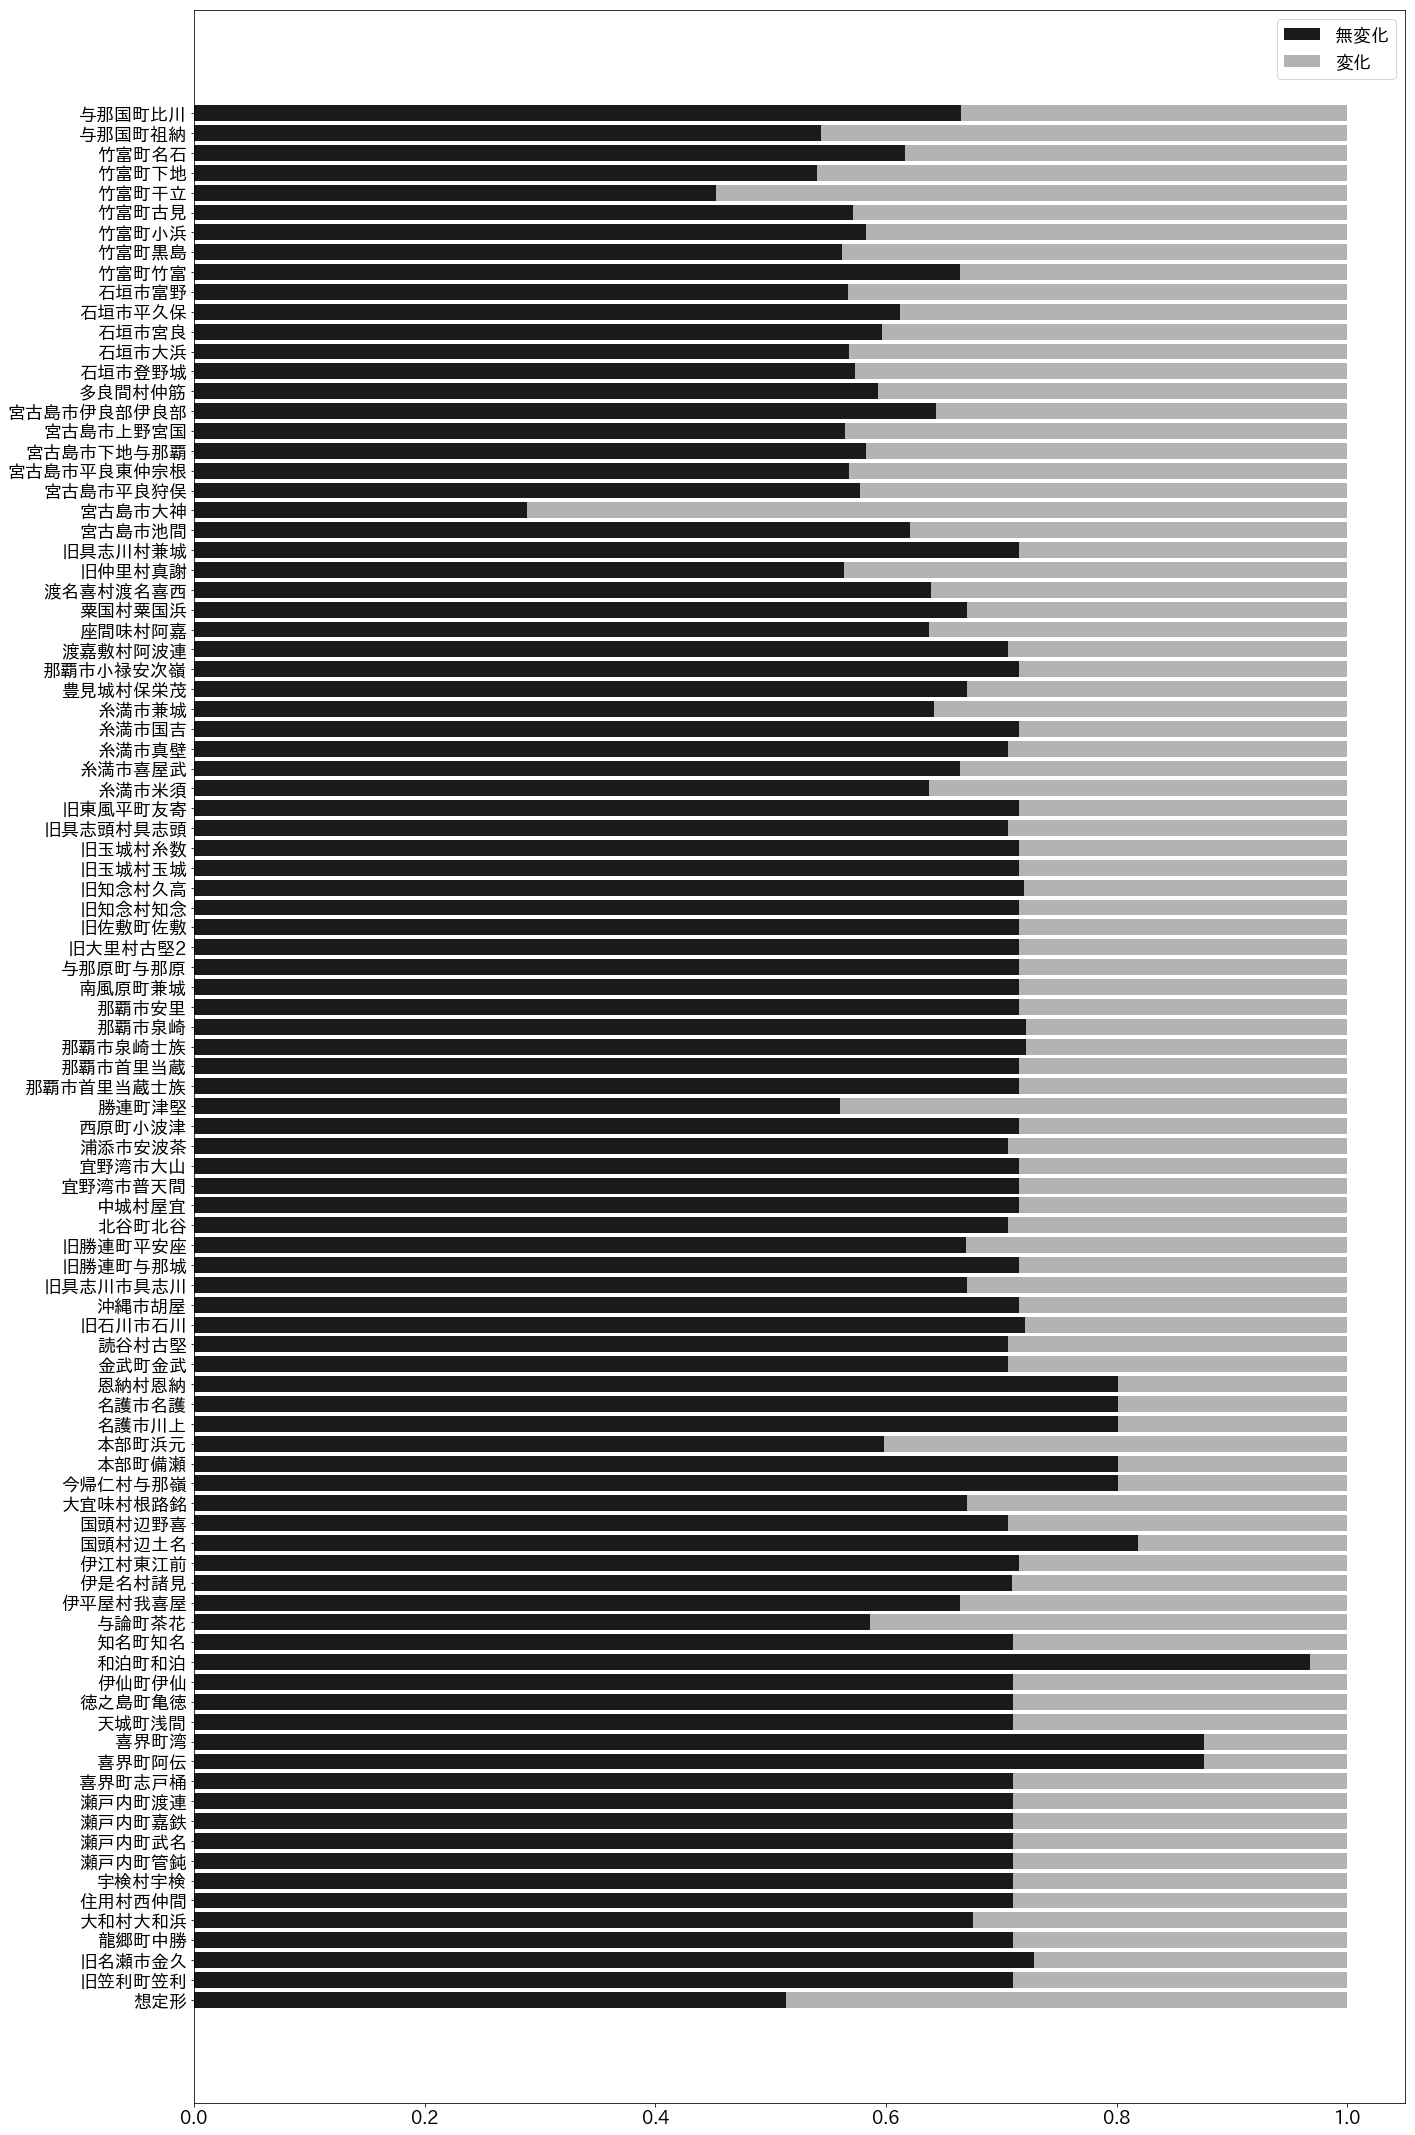

In [13]:
newdata=np.array(conper)
# x=np.linspace(0,len(consonantsList),len(consonantsList))
# y=newdata.T
x=list(locateDf.iloc[0:,1]) 
y=newdata.T
y=y/y.sum(axis=0)
# plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAexGothic'
plt.figure(figsize=(20,30))
plt.rcParams["font.size"] = 18

# plt.bar(x,y[0], color='b', label='無変化')
# plt.bar(x, y[1], bottom=y[0], color='c', label='変化') # 男性データの上に積み上がるようbottomを設定
# plt.xticks(x,consonantsList)

# 野球人口
# plt.bar(ind, bb, width=w, color='b', label='野球:男')
# btm = np.array(bb.values) # 積み上げ(底上げ)のためにデータを取得
# plt.bar(ind, bg, width=w, bottom=btm, color='c', label='野球:女') # 男性データの上に積み上がるようbottomを設定

plt.barh(x, y[0],            align="center", color="0.1", label="無変化")
plt.barh(x, y[1], left=y[0], align="center", color="0.7", label="変化")
plt.yticks(x,list(locateDf.iloc[0:,1]))

plt.legend()
plt.tight_layout()
pictname="/Users/kazuki/Documents/Study/picture/png/wordKAllper.png"
plt.savefig(pictname)

plt.show()
plt.close()

## <a id="subsection1-2" href="#subsection1-2">特定地点での特定子音の比較</a>

In [8]:
rfconsonants=basepath.fotmat("parameter/consonantsUsed.xlsx")

In [9]:
consonantsDf=pd.read_excel(rfconsonants , sheet_name=0, header=0, index_col=0)

In [10]:
consonants=consonantsDf.iloc[0:,0].tolist()

In [11]:
toku=consonants[0]

In [12]:
taisyou=[locates[1],shNs[1]]

In [13]:
triDf=pd.read_excel(rftri.format(taisyou[0]) , sheet_name=taisyou[1], header=0, index_col=0)
coinIn=[]
for pi,pattern in enumerate(list(triDf.index)):
    moto,hikaku=pattern.split("->")
    moto=moto.split(" ")
    hikaku=hikaku.split(" ")
    if toku not in moto:
        continue
    coin=moto.index(toku)
    badcounter=0
    for o1,o2 in zip(moto,hikaku):
        if o1 != o2:
            badcounter+=1
    if badcounter == 0:
        coinIn.append([pi,0])
    elif badcounter == 1 and moto[coin] != hikaku[coin]:
        coinIn.append([pi,1])
    else:
        coinIn.append([pi,2])

In [14]:
conper=[[0,0,0] for locate in locates[1:]]
# conper=[[[0,0 for consonant in consonants] for locate in locates]
triDf=pd.read_excel(rftri.format(taisyou[0]) , sheet_name=taisyou[1], header=0, index_col=0)
for ti,titen in enumerate(list(triDf.keys())):
    for i,bunrui in coinIn:
        conper[ti][bunrui]+=triDf.iat[i,ti]

In [15]:
tmlocates=[locate for locate,shN in zip(locates,shNs) if shN in list(triDf.keys())]

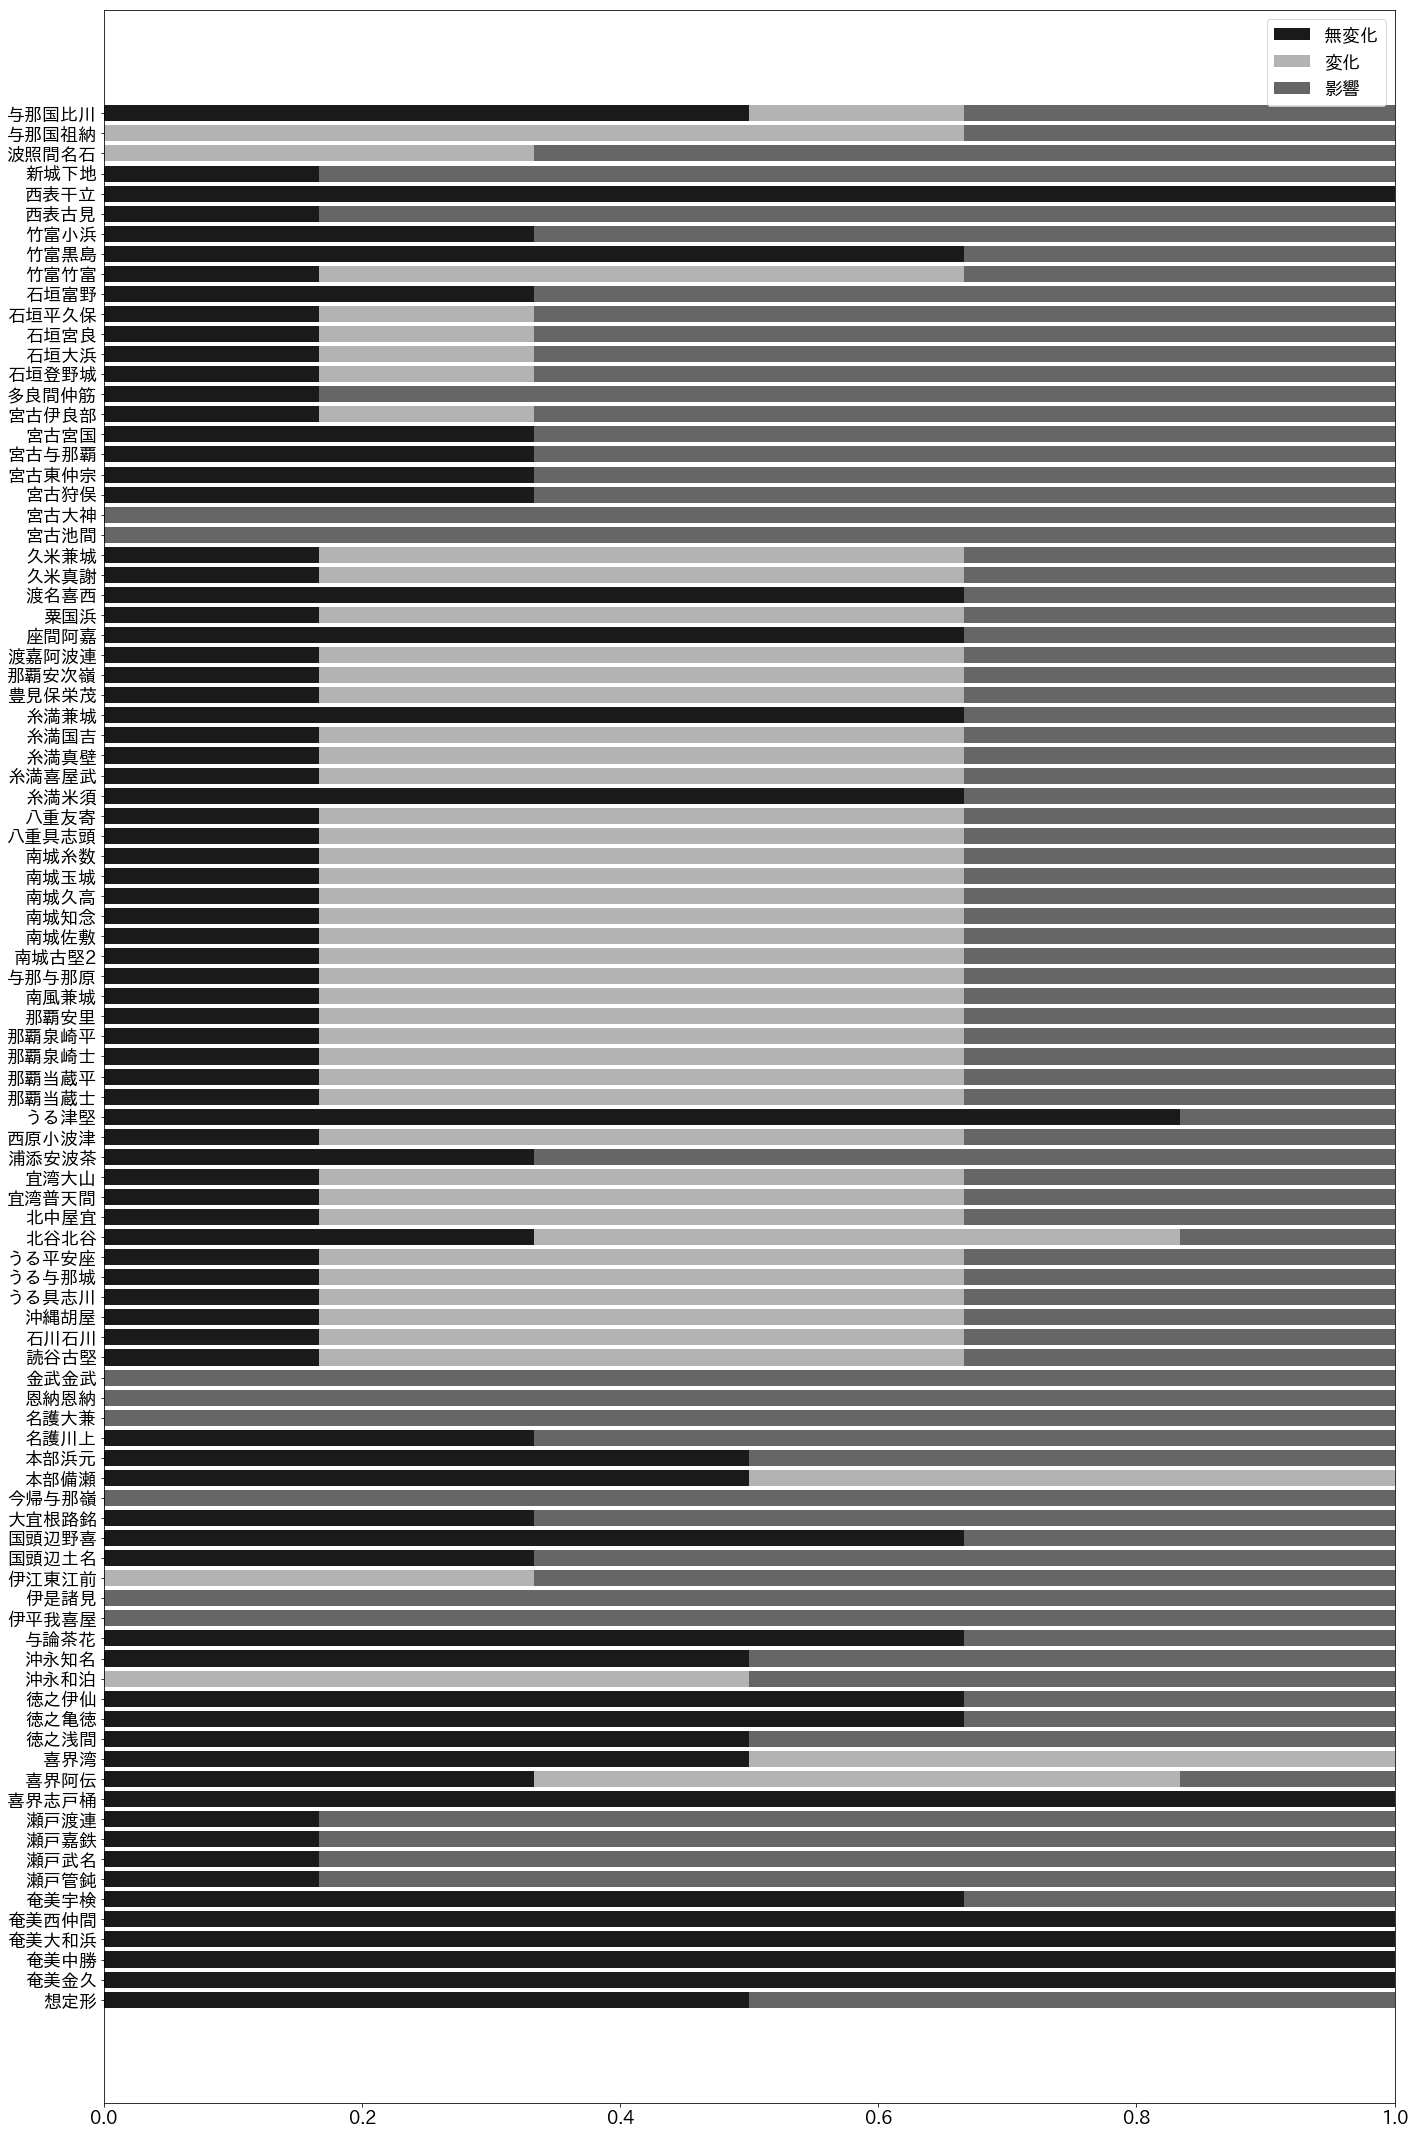

In [16]:
newdata=np.array(conper)
# x=np.linspace(0,len(consonantsList),len(consonantsList))
# y=newdata.T
x=tmlocates
y=newdata.T
y=y/y.sum(axis=0)
# plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAexGothic'
plt.figure(figsize=(20,30))
plt.rcParams["font.size"] = 18

# plt.bar(x,y[0], color='b', label='無変化')
# plt.bar(x, y[1], bottom=y[0], color='c', label='変化') # 男性データの上に積み上がるようbottomを設定
# plt.xticks(x,consonantsList)

# 野球人口
# plt.bar(ind, bb, width=w, color='b', label='野球:男')
# btm = np.array(bb.values) # 積み上げ(底上げ)のためにデータを取得
# plt.bar(ind, bg, width=w, bottom=btm, color='c', label='野球:女') # 男性データの上に積み上がるようbottomを設定

plt.barh(x, y[0],            align="center", color="0.1", label="無変化")
plt.barh(x, y[1], left=y[0], align="center", color="0.7", label="変化")
plt.barh(x, y[2], left=y[0]+y[1], align="center", color="0.4", label="影響")
plt.yticks(x,tmlocates)

plt.legend()
plt.tight_layout()
pictname="/Users/kazuki/Documents/Study/picture/png/wordKSh1.png"
plt.savefig(pictname)

plt.show()
plt.close()

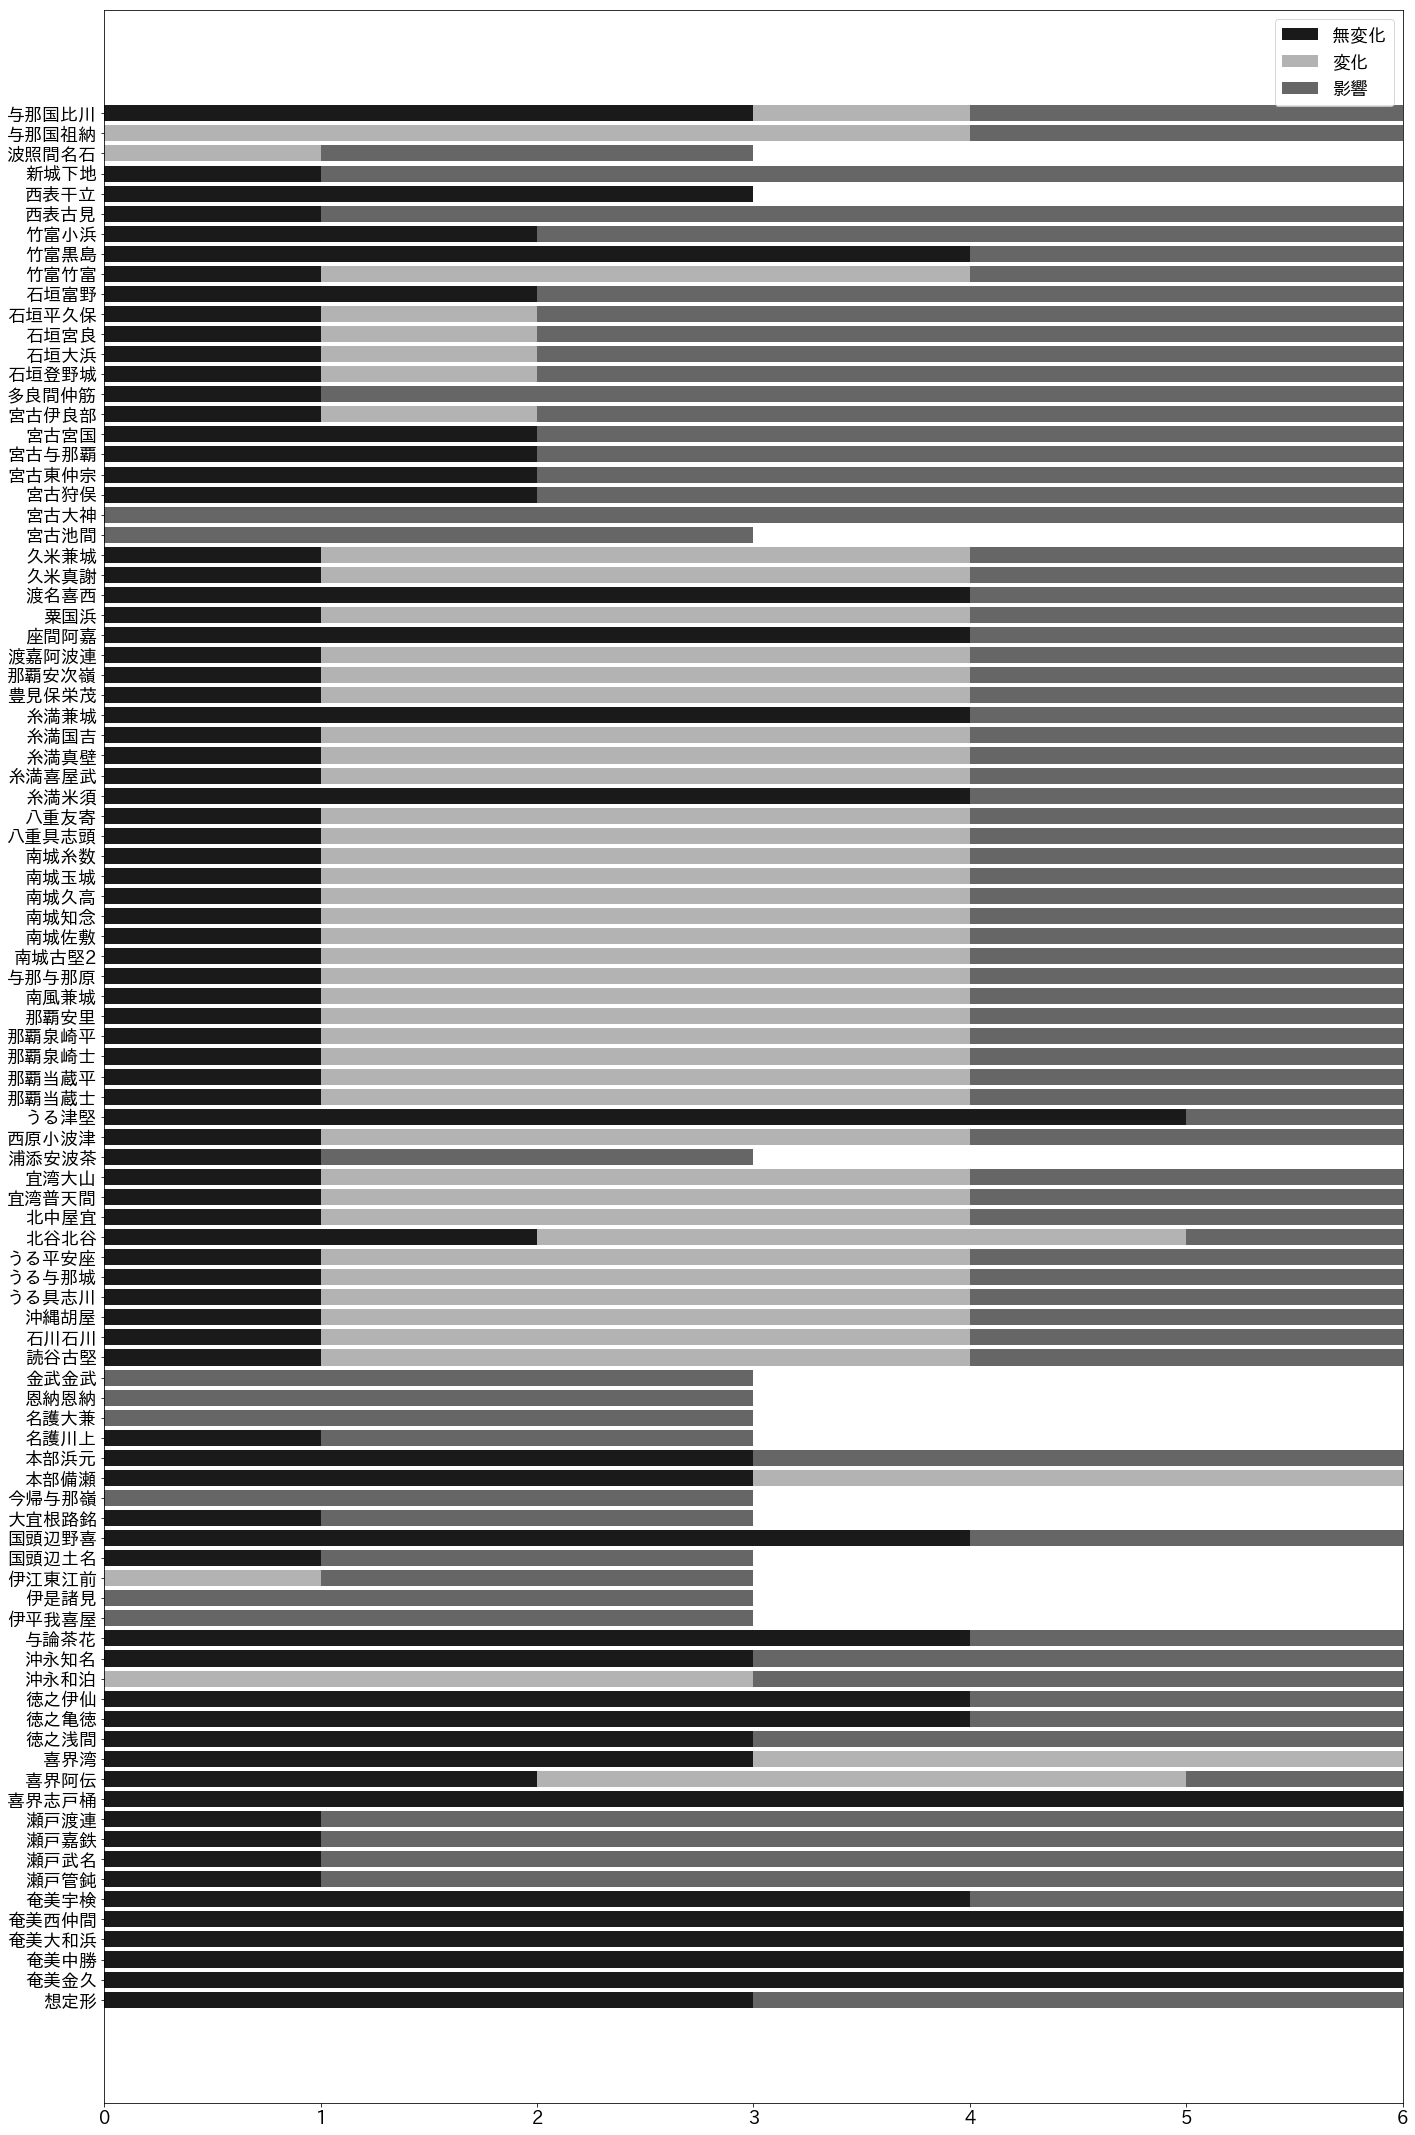

In [17]:
newdata=np.array(conper)
# x=np.linspace(0,len(consonantsList),len(consonantsList))
# y=newdata.T
x=tmlocates
y=newdata.T
# plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAexGothic'
plt.figure(figsize=(20,30))
plt.rcParams["font.size"] = 18

# plt.bar(x,y[0], color='b', label='無変化')
# plt.bar(x, y[1], bottom=y[0], color='c', label='変化') # 男性データの上に積み上がるようbottomを設定
# plt.xticks(x,consonantsList)

# 野球人口
# plt.bar(ind, bb, width=w, color='b', label='野球:男')
# btm = np.array(bb.values) # 積み上げ(底上げ)のためにデータを取得
# plt.bar(ind, bg, width=w, bottom=btm, color='c', label='野球:女') # 男性データの上に積み上がるようbottomを設定

plt.barh(x, y[0],            align="center", color="0.1", label="無変化")
plt.barh(x, y[1], left=y[0], align="center", color="0.7", label="変化")
plt.barh(x, y[2], left=y[0]+y[1], align="center", color="0.4", label="影響")
plt.yticks(x,tmlocates)

plt.legend()
plt.tight_layout()
pictname="/Users/kazuki/Documents/Study/picture/png/wordKSh1c.png"
plt.savefig(pictname)

plt.show()
plt.close()